<a href="https://colab.research.google.com/github/Untick/IrisID_gr2/blob/Alexey-Tatarinov-folder/Alexey%20Tatarinov/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%9E%D0%9E%D0%9E_%22%D0%97%D0%95%D0%9D%D0%98%D0%A6%D0%90%22_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импортирование библиотек**

In [1]:
import gdown

import os

! pip install autokeras
import autokeras as ak

! pip install Augmentor
import Augmentor

import zipfile

import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, Flatten, 
                                     Dropout, BatchNormalization, Rescaling,
                                     GlobalAveragePooling2D, RandomFlip, Input,
                                     RandomRotation, RandomZoom, RandomContrast)

from tensorflow.keras.applications import VGG19, ResNet50, Xception

# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import (ImageDataGenerator, 
                                                 DirectoryIterator)

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

from PIL import Image, ImageEnhance

import matplotlib.pyplot as plt

%matplotlib inline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 84.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Задание гиперпараметров**

In [2]:
TRAIN_PATH          = '/content/drive/MyDrive/iris_ds'
TRAIN_PATH_AUG      = '/content/drive/MyDrive/Iris'

VAL_SPLIT           = 0.2

IMG_WIDTH_1         = 160
IMG_HEIGHT_1        = 120
IMG_WIDTH_2         = 80
IMG_HEIGHT_2        = 60
IMG_CHANNELS        = 3

ROTATION_RANGE      = 10
WIDTH_SHIFT_RANGE   = 0.1
HEIGHT_SHIFT_RANGE  = 0.1
ZOOM_RANGE          = 0.1
BRIGHTNESS_RANGE    = (0.5, 1.3)
HORIZONTAL_FLIP     = False

EPOCHS              = 20
BATCH_SIZE          = 24
OPTIMIZER_LEGACY    = tf.keras.optimizers.legacy.Adam(0.0001)
OPTIMIZER           = tf.keras.optimizers.Adam(0.0001)

# **Загрузка датасета**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import files
# !zip -r folder.zip /content/drive/MyDrive/iris_ds
# files.download('folder.zip')


In [ ]:
# import zipfile
# zip_ref = zipfile.ZipFile('folder.zip', 'r')
# zip_ref.extractall('/content/drive/MyDrive/iris_ds')
# zip_ref.close()

# import mimetypes

# file_path = '/content/iris1_8'
# file_type, encoding = mimetypes.guess_type(file_path)
# print(file_type)

# **Ручная подготовка датасета и аугментация**

In [4]:
for folder in os.listdir(TRAIN_PATH):
    if os.path.isdir(os.path.join(TRAIN_PATH, folder)):
        # Создаем генератор аугментации для каждой папки
        p = Augmentor.Pipeline(os.path.join(TRAIN_PATH, folder), output_directory=os.path.join(f'/content/drive/MyDrive/Iris/{folder}'))
        # Добавляем операции аугментации
        # Вращение изображения
        p.rotate(probability=0.2, max_left_rotation=10, max_right_rotation=10)
        # увеличение
        #p.zoom(probability=0.2, min_factor=1.1, max_factor=1.2)
        # Обрезание изображения
        p.crop_random(probability=0.1, percentage_area=0.9)
        # Изменение яркости
        p.random_brightness(probability=0.5, min_factor=0.5, max_factor=1.3)
        # Изменение сонтрасности
        p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.3)
        # Применяем аугментацию
        p.sample(50)
print('Аугментация завершена')

KeyboardInterrupt: ignored

In [4]:
CLASS_LIST = sorted(os.listdir(TRAIN_PATH_AUG))
CLASS_COUNT = len(CLASS_LIST)

print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 64, метки классов: ['client_1', 'client_10', 'client_11', 'client_12', 'client_13', 'client_14', 'client_15', 'client_16', 'client_17', 'client_18', 'client_19', 'client_2', 'client_20', 'client_21', 'client_22', 'client_23', 'client_24', 'client_25', 'client_26', 'client_27', 'client_28', 'client_29', 'client_3', 'client_30', 'client_31', 'client_32', 'client_33', 'client_34', 'client_35', 'client_36', 'client_37', 'client_38', 'client_39', 'client_4', 'client_40', 'client_41', 'client_42', 'client_43', 'client_44', 'client_45', 'client_46', 'client_47', 'client_48', 'client_49', 'client_5', 'client_50', 'client_51', 'client_52', 'client_53', 'client_54', 'client_55', 'client_56', 'client_57', 'client_58', 'client_59', 'client_6', 'client_60', 'client_61', 'client_62', 'client_63', 'client_64', 'client_7', 'client_8', 'client_9']


In [5]:
data_files = []
data_labels = []

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = f'{TRAIN_PATH_AUG}/{class_name}'  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]
    data_labels += [class_label] * len(class_files)
    print(f'Размер класса {class_name} составляет {len(class_files)} снимков')
    # aug = Augmentor.Pipeline(class_path, output_directory=os.path.join('/content/drive/MyDrive/Iris'))
    # aug.rotate(probability=0.2, max_left_rotation=5, max_right_rotation=5)
    # #aug.zoom(probability=0.2, min_factor=1.1, max_factor=1.2)
    # aug.crop_random(probability=0.1, percentage_area=0.2)
    # aug.random_brightness(probability=0.5, min_factor=0.5, max_factor=1.2)
    # aug.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.2)
    # # Применяем аугментацию
    # aug.sample(200)
print('Общий размер базы для обучения:', len(data_labels))


Размер класса client_1 составляет 50 снимков
Размер класса client_10 составляет 50 снимков
Размер класса client_11 составляет 50 снимков
Размер класса client_12 составляет 50 снимков
Размер класса client_13 составляет 50 снимков
Размер класса client_14 составляет 50 снимков
Размер класса client_15 составляет 50 снимков
Размер класса client_16 составляет 50 снимков
Размер класса client_17 составляет 50 снимков
Размер класса client_18 составляет 50 снимков
Размер класса client_19 составляет 50 снимков
Размер класса client_2 составляет 50 снимков
Размер класса client_20 составляет 50 снимков
Размер класса client_21 составляет 50 снимков
Размер класса client_22 составляет 50 снимков
Размер класса client_23 составляет 50 снимков
Размер класса client_24 составляет 50 снимков
Размер класса client_25 составляет 50 снимков
Размер класса client_26 составляет 50 снимков
Размер класса client_27 составляет 50 снимков
Размер класса client_28 составляет 50 снимков
Размер класса client_29 составляет 5

In [6]:
data_images_1 = []

for file_name in data_files:
    img = Image.open(file_name).resize((IMG_WIDTH_1, IMG_HEIGHT_1)) 
    img_np = np.array(img)
    data_images_1.append(img_np)

x_data_big = np.array(data_images_1)
y_data = np.array(data_labels)

print(f'В массив собрано {len(data_images_1)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data_big.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

В массив собрано 3200 фотографий следующей формы: (120, 160, 3)
Общий массив данных изображений следующей формы: (3200, 120, 160, 3)
Общий массив меток классов следующей формы: (3200,)


In [7]:
data_images_2 = []

for file_name in data_files:
    img = Image.open(file_name).resize((IMG_WIDTH_2, IMG_HEIGHT_2)) 
    img_np = np.array(img)
    data_images_2.append(img_np)

x_data_small = np.array(data_images_2)
y_data = np.array(data_labels)

print(f'В массив собрано {len(data_images_2)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data_small.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

В массив собрано 3200 фотографий следующей формы: (60, 80, 3)
Общий массив данных изображений следующей формы: (3200, 60, 80, 3)
Общий массив меток классов следующей формы: (3200,)


In [8]:
# Разделение выборки на обучающую, проверочную и тестовую
x_ds_big, x_val_big, y_ds_big, y_val_big = train_test_split(x_data_big, y_data, test_size=0.2, random_state=42)
x_train_big, x_test_big, y_train_big, y_test_big = train_test_split(x_ds_big, y_ds_big, test_size=0.1, random_state=42)

x_ds_small, x_val_small, y_ds_small, y_val_small = train_test_split(x_data_small, y_data, test_size=0.2, random_state=42)
x_train_small, x_test_small, y_train_small, y_test_small = train_test_split(x_ds_small, y_ds_small, test_size=0.1, random_state=42)


In [9]:
y_train_small = to_categorical(y_train_small)
y_train_big = to_categorical(y_train_big)

y_val_small = to_categorical(y_val_small)
y_val_big = to_categorical(y_val_big)

y_test_small = to_categorical(y_test_small)
y_test_big = to_categorical(y_test_big)

In [10]:
print('Размерности датасетов с изображениями 160 на 120')
print('Тренировочный датасет:')
print(x_train_big.shape)
print(y_train_big.shape)
print('Проверочный датасет:')
print(x_val_big.shape)
print(y_val_big.shape)
print('Тестовый датасет:')
print(x_test_big.shape)
print(y_test_big.shape)

print('\nРазмерности датасетов с изображениями 80 на 60')
print('Тренировочный датасет:')
print(x_train_small.shape)
print(y_train_small.shape)
print('Проверочный датасет:')
print(x_val_small.shape)
print(y_val_small.shape)
print('Тестовый датасет:')
print(x_test_small.shape)
print(y_test_small.shape)

Размерности датасетов с изображениями 160 на 120
Тренировочный датасет:
(2304, 120, 160, 3)
(2304, 64)
Проверочный датасет:
(640, 120, 160, 3)
(640, 64)
Тестовый датасет:
(256, 120, 160, 3)
(256, 64)

Размерности датасетов с изображениями 80 на 60
Тренировочный датасет:
(2304, 60, 80, 3)
(2304, 64)
Проверочный датасет:
(640, 60, 80, 3)
(640, 64)
Тестовый датасет:
(256, 60, 80, 3)
(256, 64)


# **Оптимизация обучения нейронной сети**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
checkpoint = ModelCheckpoint(filepath="my_model.hdf5", monitor="val_loss", verbose=0, save_best_only=True)

# **Создание модели вручную**

In [11]:
image_shape_small = x_train_small.shape[1:]
image_shape_big = x_train_big.shape[1:]  

model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape_big))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(CLASS_COUNT, activation='softmax'))

In [12]:
model_1 = Sequential()
model_1.add(Conv2D(64, (3, 3), activation='relu', input_shape=image_shape_small))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(CLASS_COUNT, activation='softmax'))

In [38]:
model_2.compile(
              optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics='accuracy')
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 36, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 59904)             0

In [14]:
model_1.compile(
              optimizer=OPTIMIZER,
              loss='categorical_crossentropy',
              metrics='accuracy')
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 58, 78, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 37, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 16, 128)       147584    
                                                                 
 flatten_1 (Flatten)         (None, 22528)            

In [15]:
history_small = model_1.fit(
                          x_train_small,
                          y_train_small,
                          epochs=EPOCHS,
                          validation_data=(x_val_small, y_val_small),
                          # callbacks=checkpoint,
                          )


Epoch 1/20
72/72 [==============================] - 14s 18ms/step - loss: 6.7168 - accuracy: 0.0286 - val_loss: 4.1076 - val_accuracy: 0.0156
Epoch 2/20
72/72 [==============================] - 1s 12ms/step - loss: 4.0385 - accuracy: 0.0369 - val_loss: 3.9744 - val_accuracy: 0.0609
Epoch 3/20
72/72 [==============================] - 1s 12ms/step - loss: 3.8030 - accuracy: 0.0838 - val_loss: 3.6405 - val_accuracy: 0.1406
Epoch 4/20
72/72 [==============================] - 1s 11ms/step - loss: 3.4251 - accuracy: 0.1714 - val_loss: 3.4249 - val_accuracy: 0.1797
Epoch 5/20
72/72 [==============================] - 1s 12ms/step - loss: 3.0709 - accuracy: 0.2335 - val_loss: 3.0455 - val_accuracy: 0.2438
Epoch 6/20
72/72 [==============================] - 1s 13ms/step - loss: 2.6592 - accuracy: 0.2956 - val_loss: 2.6205 - val_accuracy: 0.3547
Epoch 7/20
72/72 [==============================] - 1s 12ms/step - loss: 2.1779 - accuracy: 0.4349 - val_loss: 2.3553 - val_accuracy: 0.4547
Epoch 8/20
7

In [39]:
history_big = model_2.fit(
                        x_train_big,
                        y_train_big,
                        validation_data=(x_val_big, y_val_big),
                        epochs=EPOCHS,
                        # callbacks=checkpoint,
                        )

Epoch 1/20
72/72 [==============================] - 3s 22ms/step - loss: 4.1577 - accuracy: 0.0187 - val_loss: 4.1646 - val_accuracy: 0.0094
Epoch 2/20
72/72 [==============================] - 1s 18ms/step - loss: 4.1573 - accuracy: 0.0187 - val_loss: 4.1654 - val_accuracy: 0.0094
Epoch 3/20
72/72 [==============================] - 1s 19ms/step - loss: 4.1571 - accuracy: 0.0187 - val_loss: 4.1662 - val_accuracy: 0.0094
Epoch 4/20
72/72 [==============================] - 1s 19ms/step - loss: 4.1569 - accuracy: 0.0187 - val_loss: 4.1669 - val_accuracy: 0.0094
Epoch 5/20
72/72 [==============================] - 1s 19ms/step - loss: 4.1568 - accuracy: 0.0187 - val_loss: 4.1677 - val_accuracy: 0.0094
Epoch 6/20
72/72 [==============================] - 1s 18ms/step - loss: 4.1565 - accuracy: 0.0187 - val_loss: 4.1683 - val_accuracy: 0.0094
Epoch 7/20
72/72 [==============================] - 1s 18ms/step - loss: 4.1564 - accuracy: 0.0187 - val_loss: 4.1688 - val_accuracy: 0.0094
Epoch 8/20
72

# **Загрузка датасета при помощи image_dataset_from_directory, слои с аугментацией и создание модели**

### **Разметка датасета**

In [29]:
train_ds, validation_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_PATH,
  validation_split=0.15,
  subset="both",
  label_mode = 'categorical',
  color_mode = "rgb",
  seed=123,
  image_size=(IMG_HEIGHT_2, IMG_WIDTH_2),
  batch_size=BATCH_SIZE)

print(train_ds.element_spec)

class_names = train_ds.class_names
print(class_names)

Found 384 files belonging to 64 classes.
Using 327 files for training.
Using 57 files for validation.
(TensorSpec(shape=(None, 60, 80, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 64), dtype=tf.float32, name=None))
['client_1', 'client_10', 'client_11', 'client_12', 'client_13', 'client_14', 'client_15', 'client_16', 'client_17', 'client_18', 'client_19', 'client_2', 'client_20', 'client_21', 'client_22', 'client_23', 'client_24', 'client_25', 'client_26', 'client_27', 'client_28', 'client_29', 'client_3', 'client_30', 'client_31', 'client_32', 'client_33', 'client_34', 'client_35', 'client_36', 'client_37', 'client_38', 'client_39', 'client_4', 'client_40', 'client_41', 'client_42', 'client_43', 'client_44', 'client_45', 'client_46', 'client_47', 'client_48', 'client_49', 'client_5', 'client_50', 'client_51', 'client_52', 'client_53', 'client_54', 'client_55', 'client_56', 'client_57', 'client_58', 'client_59', 'client_6', 'client_60', 'client_61', 'client_62', 'client_63

In [30]:
image_batch, _ = next(iter(train_ds))

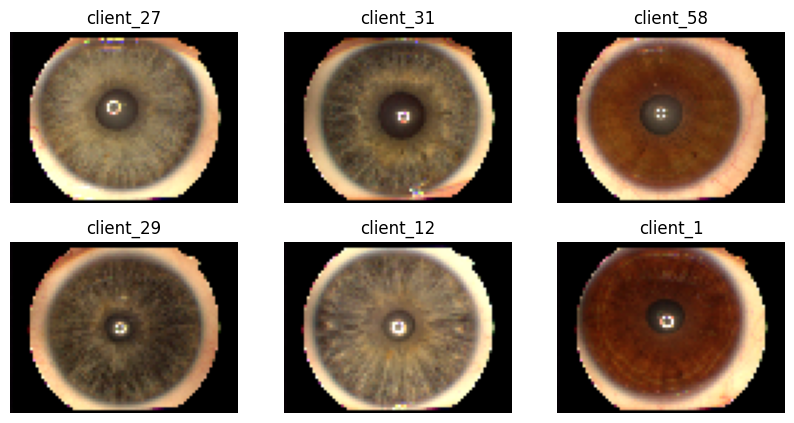

In [31]:
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

### **Аугментация данных**

In [32]:
train_ds.element_spec[0].shape[1:]

TensorShape([60, 80, 3])

In [33]:
image_shape = train_ds.element_spec[0].shape[1:]

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomZoom((-0.1, 0.1)),
  tf.keras.layers.RandomContrast(0.1),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomBrightness(0.1),
  # tf.keras.layers.RandomFlip(mode="horizontal"),
  ])   

inputs = tf.keras.Input(shape=(image_shape))
x = data_augmentation(inputs)
x = Conv2D(16, (3, 3), padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(len(class_names), 
                activation='softmax'
)(x)
model = tf.keras.Model(inputs, outputs)

In [35]:
model.compile(
              optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='categorical_crossentropy',
              # tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics='accuracy')


### **Обучение модели**

In [37]:
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=EPOCHS,
  # callbacks=checkpoint,
  )

Epoch 1/20
14/14 [==============================] - 41s 3s/step - loss: 4.3824 - accuracy: 0.0122 - val_loss: 11.8914 - val_accuracy: 0.0175
Epoch 2/20
14/14 [==============================] - 3s 121ms/step - loss: 4.0778 - accuracy: 0.0520 - val_loss: 9.5760 - val_accuracy: 0.0000e+00
Epoch 3/20
14/14 [==============================] - 5s 237ms/step - loss: 3.9319 - accuracy: 0.0765 - val_loss: 7.6355 - val_accuracy: 0.0000e+00
Epoch 4/20
14/14 [==============================] - 3s 118ms/step - loss: 3.8242 - accuracy: 0.0642 - val_loss: 6.4771 - val_accuracy: 0.0000e+00
Epoch 5/20
14/14 [==============================] - 3s 131ms/step - loss: 3.8051 - accuracy: 0.0612 - val_loss: 5.9597 - val_accuracy: 0.0000e+00
Epoch 6/20
14/14 [==============================] - 3s 117ms/step - loss: 3.6746 - accuracy: 0.0917 - val_loss: 5.5064 - val_accuracy: 0.0000e+00
Epoch 7/20
14/14 [==============================] - 6s 162ms/step - loss: 3.5524 - accuracy: 0.1590 - val_loss: 4.9864 - val_accu

# **Создание модели с ImageDataGenerator**

### **Разметка датасета**

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(TRAIN_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 64, метки классов: ['client_1', 'client_10', 'client_11', 'client_12', 'client_13', 'client_14', 'client_15', 'client_16', 'client_17', 'client_18', 'client_19', 'client_2', 'client_20', 'client_21', 'client_22', 'client_23', 'client_24', 'client_25', 'client_26', 'client_27', 'client_28', 'client_29', 'client_3', 'client_30', 'client_31', 'client_32', 'client_33', 'client_34', 'client_35', 'client_36', 'client_37', 'client_38', 'client_39', 'client_4', 'client_40', 'client_41', 'client_42', 'client_43', 'client_44', 'client_45', 'client_46', 'client_47', 'client_48', 'client_49', 'client_5', 'client_50', 'client_51', 'client_52', 'client_53', 'client_54', 'client_55', 'client_56', 'client_57', 'client_58', 'client_59', 'client_6', 'client_60', 'client_61', 'client_62', 'client_63', 'client_64', 'client_7', 'client_8', 'client_9']


### **Аугментация изображений**

In [40]:
train_datagen = ImageDataGenerator(
                    rescale=1. / 255.,
                    rotation_range=ROTATION_RANGE,
                    width_shift_range=WIDTH_SHIFT_RANGE,
                    height_shift_range=HEIGHT_SHIFT_RANGE,
                    zoom_range=ZOOM_RANGE,
                    brightness_range=BRIGHTNESS_RANGE,
                    # horizontal_flip=HORIZONTAL_FLIP,
                    validation_split=VAL_SPLIT
                )


In [41]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_HEIGHT_2, IMG_WIDTH_2),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_HEIGHT_2, IMG_WIDTH_2),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 320 images belonging to 64 classes.
Found 64 images belonging to 64 classes.


In [42]:
# Проверка формы данных
print(f'Формы данных тренировочной выборки: {train_generator[0][0].shape}, {train_generator[0][1].shape}, батчей: {len(train_generator)}')
print(f'Формы данных   проверочной выборки: {validation_generator[0][0].shape}, {validation_generator[0][1].shape}, батчей: {len(validation_generator)}')

print()

# Проверка назначения меток классов
print(f'Метки классов тренировочной выборки: {train_generator.class_indices}')
print(f'Метки классов   проверочной выборки: {validation_generator.class_indices}')


Формы данных тренировочной выборки: (24, 60, 80, 3), (24, 64), батчей: 14
Формы данных   проверочной выборки: (24, 60, 80, 3), (24, 64), батчей: 3

Метки классов тренировочной выборки: {'client_1': 0, 'client_10': 1, 'client_11': 2, 'client_12': 3, 'client_13': 4, 'client_14': 5, 'client_15': 6, 'client_16': 7, 'client_17': 8, 'client_18': 9, 'client_19': 10, 'client_2': 11, 'client_20': 12, 'client_21': 13, 'client_22': 14, 'client_23': 15, 'client_24': 16, 'client_25': 17, 'client_26': 18, 'client_27': 19, 'client_28': 20, 'client_29': 21, 'client_3': 22, 'client_30': 23, 'client_31': 24, 'client_32': 25, 'client_33': 26, 'client_34': 27, 'client_35': 28, 'client_36': 29, 'client_37': 30, 'client_38': 31, 'client_39': 32, 'client_4': 33, 'client_40': 34, 'client_41': 35, 'client_42': 36, 'client_43': 37, 'client_44': 38, 'client_45': 39, 'client_46': 40, 'client_47': 41, 'client_48': 42, 'client_49': 43, 'client_5': 44, 'client_50': 45, 'client_51': 46, 'client_52': 47, 'client_53': 

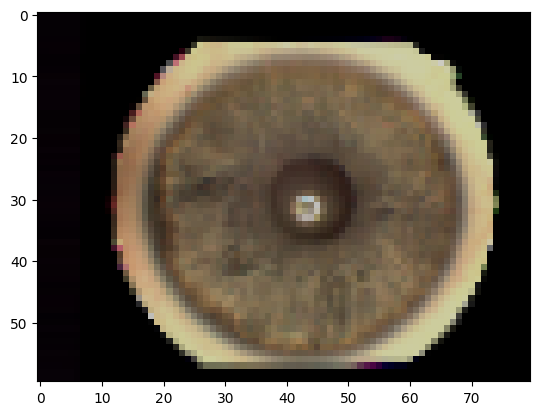

In [43]:
plt.imshow(train_generator[1][0][2])
plt.show()

### **Создание и обучение нейронной сети**

In [44]:
def compile_train_model(model,                                        # модель нейронной сети
                        train_data,                                   # обучающие данные
                        val_data,                                     # проверочные данные
                        optimizer=tf.keras.optimizers.Adam(0.0001),   # оптимизатор
                        epochs=EPOCHS,                                # количество эпох обучения
                        batch_size=BATCH_SIZE,                        # размер батча
                        figsize=(20, 5)):                             # размер полотна для графиков

    # Компиляция модели
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history_2 = model.fit(train_data,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=val_data)

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history_2.history['accuracy'], 
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history_2.history['val_accuracy'], 
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history_2.history['loss'], 
               label='Ошибка на обучающем наборе')
    ax2.plot(history_2.history['val_loss'], 
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 58, 78, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 58, 78, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 76, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 18, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 18, 25, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 28800)            

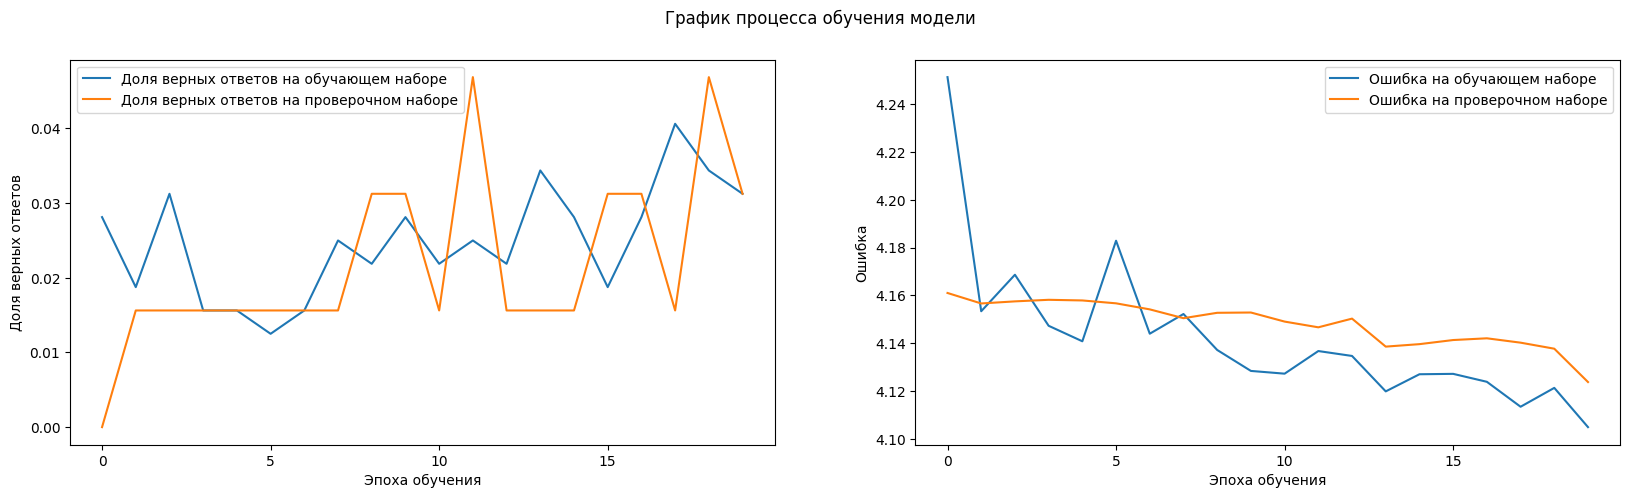

In [45]:
model_iris = Sequential()

model_iris.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT_2, IMG_WIDTH_2, IMG_CHANNELS)))
model_iris.add(BatchNormalization())

model_iris.add(Conv2D(64, (3, 3), activation='relu'))
model_iris.add(MaxPooling2D(pool_size=(3, 3)))
model_iris.add(Dropout(0.2))

# model_iris.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model_iris.add(BatchNormalization())

model_iris.add(Flatten())

model_iris.add(Dense(32, activation='relu'))

model_iris.add(Dense(CLASS_COUNT, activation='softmax')) 

compile_train_model(model_iris,
                    train_generator,
                    validation_generator,
                    )

# **Создание модели с использованием предобученных сетей**

In [60]:
train_ds, validation_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_PATH,
  validation_split=0.15,
  subset="both",
  label_mode = 'categorical',
  color_mode = "rgb",
  seed=123,
  image_size=(IMG_HEIGHT_1, IMG_WIDTH_1),
  batch_size=BATCH_SIZE)

print(train_ds.element_spec)

class_names = train_ds.class_names
print(class_names)

Found 384 files belonging to 64 classes.
Using 327 files for training.
Using 57 files for validation.
(TensorSpec(shape=(None, 120, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 64), dtype=tf.float32, name=None))
['client_1', 'client_10', 'client_11', 'client_12', 'client_13', 'client_14', 'client_15', 'client_16', 'client_17', 'client_18', 'client_19', 'client_2', 'client_20', 'client_21', 'client_22', 'client_23', 'client_24', 'client_25', 'client_26', 'client_27', 'client_28', 'client_29', 'client_3', 'client_30', 'client_31', 'client_32', 'client_33', 'client_34', 'client_35', 'client_36', 'client_37', 'client_38', 'client_39', 'client_4', 'client_40', 'client_41', 'client_42', 'client_43', 'client_44', 'client_45', 'client_46', 'client_47', 'client_48', 'client_49', 'client_5', 'client_50', 'client_51', 'client_52', 'client_53', 'client_54', 'client_55', 'client_56', 'client_57', 'client_58', 'client_59', 'client_6', 'client_60', 'client_61', 'client_62', 'client_

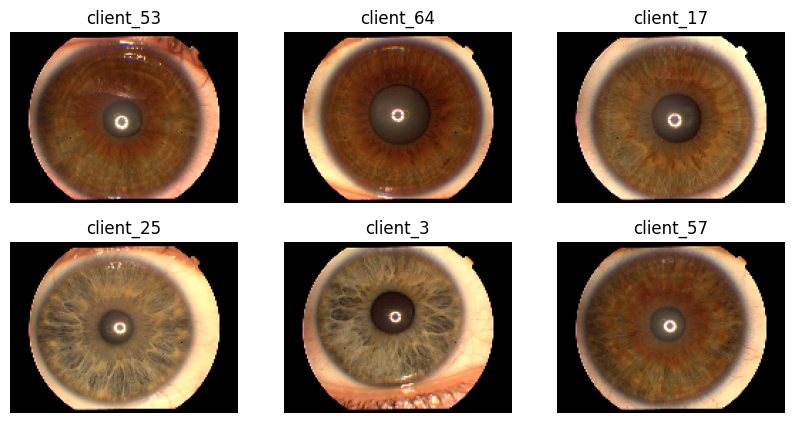

In [61]:
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [62]:
image_shape = train_ds.element_spec[0].shape[1:]
checkpoint = ModelCheckpoint(filepath="my_model.hdf5", monitor="val_loss", verbose=0, save_best_only=True)

In [69]:
# vgg19_preprocess_input = tf.keras.applications.vgg19.preprocess_input
# vgg19_layer = tf.keras.applications.vgg19.VGG19(input_shape=image_shape,
#                          include_top=False,
#                          weights='imagenet')

# xception_preprocess_input = tf.keras.applications.xception.preprocess_input
# xception_layer = tf.keras.applications.xception.Xception(input_shape=image_shape,
#                          include_top=False,
#                          weights='imagenet')

resnet50_preprocess_input = tf.keras.applications.resnet50.preprocess_input
resnet50_layer = tf.keras.applications.resnet50.ResNet50(input_shape=image_shape,
                         include_top=False,
                         weights='imagenet')

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomZoom((-0.1, 0.1)),
  tf.keras.layers.RandomContrast(0.2),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomBrightness(0.4),
  # tf.keras.layers.RandomFlip(mode="horizontal"),
  ])   

inputs = tf.keras.Input(shape=(image_shape))
x = data_augmentation(inputs)
# x = vgg19_preprocess_input(x)
# x = vgg19_layer(x, training=False)
x = resnet50_preprocess_input(x)
x = resnet50_layer(x, training=False)
# x = xception_preprocess_input(x)
# x = xception_layer(x, training=False)

x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
# x = Conv2D(16, (3, 3), padding='valid', activation='relu')(x)
# x = BatchNormalization()(x)
# x = Conv2D(32, (3, 3), padding='valid', activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.2)(x)
# x = Flatten()(x)
# x = Dense(100, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dense(50, activation='relu')(x)
# x = Dropout(0.2)(x)
outputs = Dense(len(class_names), 
                activation='softmax'
)(x)
model = tf.keras.Model(inputs, outputs)

In [70]:
model.compile(
              optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='categorical_crossentropy',
              metrics='accuracy')

In [71]:
history_resnet = model.fit(
                           train_ds,
                           validation_data=validation_ds,
                           epochs=50,
                           callbacks=checkpoint,
                           )

Epoch 1/50
14/14 [==============================] - 44s 267ms/step - loss: 4.4403 - accuracy: 0.0061 - val_loss: 4.1921 - val_accuracy: 0.0526
Epoch 2/50
14/14 [==============================] - 4s 199ms/step - loss: 4.1754 - accuracy: 0.0122 - val_loss: 4.1778 - val_accuracy: 0.0000e+00
Epoch 3/50
14/14 [==============================] - 6s 269ms/step - loss: 4.1293 - accuracy: 0.0306 - val_loss: 4.1748 - val_accuracy: 0.0175
Epoch 4/50
14/14 [==============================] - 4s 194ms/step - loss: 4.0440 - accuracy: 0.0581 - val_loss: 4.1790 - val_accuracy: 0.0000e+00
Epoch 5/50
14/14 [==============================] - 5s 199ms/step - loss: 3.9282 - accuracy: 0.0336 - val_loss: 3.9008 - val_accuracy: 0.0175
Epoch 6/50
14/14 [==============================] - 6s 255ms/step - loss: 3.6816 - accuracy: 0.0612 - val_loss: 3.6694 - val_accuracy: 0.1053
Epoch 7/50
14/14 [==============================] - 4s 199ms/step - loss: 3.3473 - accuracy: 0.1162 - val_loss: 3.7260 - val_accuracy: 0.08

In [72]:
model_resnet50 = model.save_weights(filepath='model_weights_resnet50.h5')


In [55]:
model.load_weights(filepath='model_weights_resnet50.h5')

FileNotFoundError: ignored

# **Just some try**

In [12]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(TRAIN_PATH_AUG))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 64, метки классов: ['client_1', 'client_10', 'client_11', 'client_12', 'client_13', 'client_14', 'client_15', 'client_16', 'client_17', 'client_18', 'client_19', 'client_2', 'client_20', 'client_21', 'client_22', 'client_23', 'client_24', 'client_25', 'client_26', 'client_27', 'client_28', 'client_29', 'client_3', 'client_30', 'client_31', 'client_32', 'client_33', 'client_34', 'client_35', 'client_36', 'client_37', 'client_38', 'client_39', 'client_4', 'client_40', 'client_41', 'client_42', 'client_43', 'client_44', 'client_45', 'client_46', 'client_47', 'client_48', 'client_49', 'client_5', 'client_50', 'client_51', 'client_52', 'client_53', 'client_54', 'client_55', 'client_56', 'client_57', 'client_58', 'client_59', 'client_6', 'client_60', 'client_61', 'client_62', 'client_63', 'client_64', 'client_7', 'client_8', 'client_9']


In [ ]:
data_files = []                                    # Cписок путей к файлам картинок
data_labels = []                                   # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):             # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]           # Выборка имени класса из списка имен
    class_path = f'{TRAIN_PATH_AUG}/{class_name}'  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)           # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} снимков')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * 2 * len(class_files)
    print([class_label] * 2 * len(class_files))

print('Общий размер базы для обучения:', len(data_labels))

Размер класса client_1 составляет 6 снимков
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Размер класса client_10 составляет 6 снимков
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Размер класса client_11 составляет 6 снимков
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Размер класса client_12 составляет 6 снимков
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Размер класса client_13 составляет 6 снимков
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Размер класса client_14 составляет 6 снимков
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Размер класса client_15 составляет 6 снимков
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
Размер класса client_16 составляет 6 снимков
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Размер класса client_17 составляет 6 снимков
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Размер класса client_18 составляет 6 снимков
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Размер класса client_19 составляет 6 снимков
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Размер класса client_2 составляет 6 снимков
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [ ]:
IMG_WIDTH = 160
IMG_HEIGHT = 120

import numpy as np

data_images = []

for file_name in data_files:
    img = Image.open(file_name).resize((IMG_WIDTH, IMG_HEIGHT)) 
    img_np = np.array(img)
    data_images.append(img_np)
    data_images.append(img_np)

x_data = np.array(data_images)
y_data = np.array(data_labels)

print(f'В массив собрано {len(data_images)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

В массив собрано 768 фотографий следующей формы: (120, 160, 3)
Общий массив данных изображений следующей формы: (768, 120, 160, 3)
Общий массив меток классов следующей формы: (768,)


In [ ]:
# Разделение проверочной выборки на проверочную и тестовую
x_ds, x_test, y_ds, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)

In [ ]:
train_ds, validation_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_PATH,
  validation_split=0.15,
  subset="both",
  label_mode = 'categorical',
  color_mode = "rgb",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

print(train_ds.element_spec)

class_names = train_ds.class_names
print(class_names)

Found 384 files belonging to 64 classes.
Using 327 files for training.
Using 57 files for validation.
(TensorSpec(shape=(None, 240, 320, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 64), dtype=tf.float32, name=None))
['client_1', 'client_10', 'client_11', 'client_12', 'client_13', 'client_14', 'client_15', 'client_16', 'client_17', 'client_18', 'client_19', 'client_2', 'client_20', 'client_21', 'client_22', 'client_23', 'client_24', 'client_25', 'client_26', 'client_27', 'client_28', 'client_29', 'client_3', 'client_30', 'client_31', 'client_32', 'client_33', 'client_34', 'client_35', 'client_36', 'client_37', 'client_38', 'client_39', 'client_4', 'client_40', 'client_41', 'client_42', 'client_43', 'client_44', 'client_45', 'client_46', 'client_47', 'client_48', 'client_49', 'client_5', 'client_50', 'client_51', 'client_52', 'client_53', 'client_54', 'client_55', 'client_56', 'client_57', 'client_58', 'client_59', 'client_6', 'client_60', 'client_61', 'client_62', 'client_

In [ ]:
os.listdir(os.path.join(TRAIN_PATH, class_names[0]))[1]

'001L_2.png'

In [ ]:
for i, class_name in enumerate(os.listdir(TRAIN_PATH)):
  class_dir = os.path.join(TRAIN_PATH, class_name)
  for file_name in os.listdir(class_dir):
    file_path = os.path.join(class_dir, file_name)
    _, ext = os.path.splitext(file_name)
    if ext.lower() in ['.jpg', '.jpeg', '.png']:
      new_dir_name = str(i) + ('L' if file_name.endswith('L_1' + ext) or 
                               file_name.endswith('L_2' + ext) or 
                               file_name.endswith('L_3' + ext) else 'R')
      new_dir_path = os.path.join(TRAIN_PATH, new_dir_name)
      if not os.path.exists(new_dir_path):
        os.makedirs(new_dir_path)
      new_file_path = os.path.join(new_dir_path, file_name)
      os.rename(file_path, new_file_path)
    print(new_file_path)

client_65 = os.path.join(TRAIN_PATH, 'client_65')
if not os.path.exists(client_65):
  os.makedirs(client_65)

/content/drive/MyDrive/iris_ds/66L/022L_1.png
/content/drive/MyDrive/iris_ds/67L/022L_3.png
/content/drive/MyDrive/iris_ds/67L/022L_2.png
/content/drive/MyDrive/iris_ds/67R/022R_2.png
/content/drive/MyDrive/iris_ds/67R/022R_1.png
/content/drive/MyDrive/iris_ds/67R/022R_3.png
/content/drive/MyDrive/iris_ds/68L/047L_1.png
/content/drive/MyDrive/iris_ds/69L/047L_2.png
/content/drive/MyDrive/iris_ds/69L/047L_3.png
/content/drive/MyDrive/iris_ds/69R/047R_1.png
/content/drive/MyDrive/iris_ds/69R/047R_2.png
/content/drive/MyDrive/iris_ds/69R/047R_3.png
/content/drive/MyDrive/iris_ds/70L/025L_1.png
/content/drive/MyDrive/iris_ds/71L/025L_3.png
/content/drive/MyDrive/iris_ds/71L/025L_2.png
/content/drive/MyDrive/iris_ds/71R/025R_2.png
/content/drive/MyDrive/iris_ds/71R/025R_1.png
/content/drive/MyDrive/iris_ds/71R/025R_3.png
/content/drive/MyDrive/iris_ds/72L/012L_2.png
/content/drive/MyDrive/iris_ds/72L/012L_3.png
/content/drive/MyDrive/iris_ds/72R/012R_1.png
/content/drive/MyDrive/iris_ds/72R

# **Использование AutoML**

In [ ]:
clf = ak.ImageClassifier(
    max_trials=3,
    objective='val_accuracy',
    directory='automl_irisID_1',
    overwrite=True)

clf.fit(x_train_small, y_train_small, epochs=10, validation_data=(x_val_small, y_val_small))

Trial 3 Complete [00h 25m 58s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 31m 57s
Epoch 1/10
Not enough memory, reduce batch size to 16.
Epoch 1/10
144/144 [==============================] - 213s 932ms/step - loss: 3.8259 - accuracy: 0.2036 - val_loss: 4.1778 - val_accuracy: 0.0141
Epoch 2/10
144/144 [==============================] - 127s 880ms/step - loss: 2.4591 - accuracy: 0.7687 - val_loss: 3.8546 - val_accuracy: 0.1063
Epoch 3/10
144/144 [==============================] - 127s 883ms/step - loss: 1.0129 - accuracy: 0.9688 - val_loss: 2.0600 - val_accuracy: 0.7266
Epoch 4/10
144/144 [==============================] - 128s 888ms/step - loss: 0.3681 - accuracy: 0.9952 - val_loss: 0.8144 - val_accuracy: 0.9500
Epoch 5/10
144/144 [==============================] - 127s 880ms/step - loss: 0.1769 - accuracy: 0.9983 - val_loss: 0.1561 - val_accuracy: 0.9984
Epoch 6/10
144/144 [==============================] - 127s 881ms/step - loss: 0.1028 - accuracy: 0.9991

In [3]:
# clf.save('model_autokeras_iris_v1', save_format="h5")


# **Проверка и визуализация работы модели**

In [7]:
scores_big = model_2.evaluate(x_test_big, 
                              y_test_big, 
                              verbose=1
                              )

print('Процент верных ответов на тестовых данных размером 160 на 120:', round(scores_big[1],2) * 100, '%')


In [8]:
scores_small = model_1.evaluate(x_test_small, 
                                y_test_small, 
                                verbose=1
                                )

print('Процент верных ответов на тестовых данных размером 160 на 120:', round(scores_autokeras[1],2) * 100, '%')


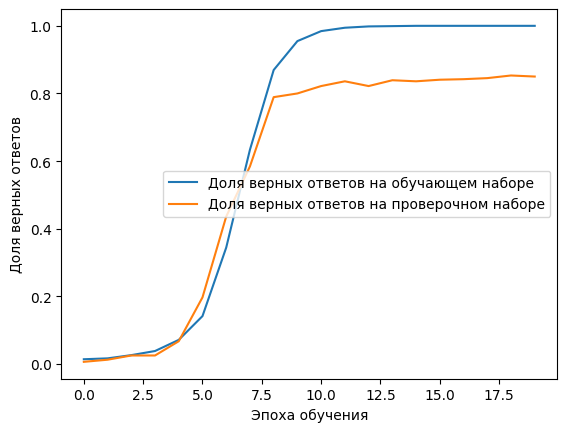

In [58]:
# Визуализация точности на обучающей выборке

plt.plot(history_big.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history_big.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# # Визуализация точности на тестовой выборке
# plt.plot(scores_big.history['accuracy'], 
#          label='Доля верных ответов на тестовом наборе размером 160 на 120')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

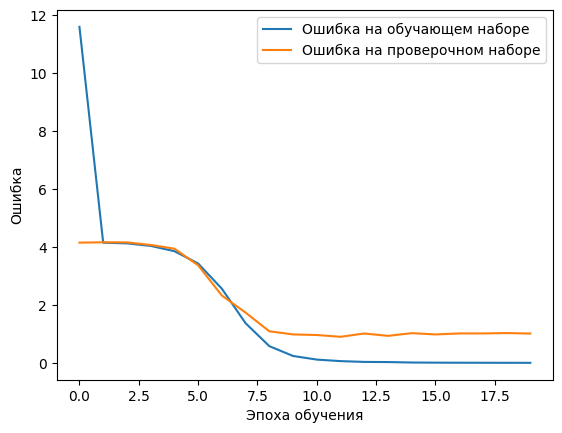

In [60]:
plt.plot(history_big.history['loss'], 
         label='Ошибка на обучающем наборе')

plt.plot(history_big.history['val_loss'], 
         label='Ошибка на проверочном наборе')

# plt.plot(scores_big.history['loss'], 
#          label='Ошибка на тестовом наборе размером 160 на 120')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()

plt.show()

In [65]:
x = x_test_big[10]
print(x.shape)

x = np.expand_dims(x, axis=0)
print(x.shape)

prediction = model.predict(x) 
print(prediction)

pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')
print(f'Исходная цифра: {np.argmax(y_test_big[2])}')

(120, 160, 3)
(1, 120, 160, 3)
1/1 [==============================] - 0s 97ms/step
[[0.0000000e+00 0.0000000e+00 9.6225891e-32 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 2.3074159e-30
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.1487809e-36
  1.5809663e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 8.3055438e-17 0.0000000e+00
  4.8403899e-16 0.0000000e+00 0.0000000e+00 0.0000000